In [3]:
import sys
import os
import json
import pickle

main_dir = os.path.dirname(os.path.abspath(''))
sys.path.insert(0, main_dir)

from src.commands.train import Trainer

In [ ]:
# Training

In [8]:
# config_name = 'config_name'
config_name = "empiar10028"
relative_config_path = os.path.join('configs/', config_name + '.json')
with open(os.path.join(main_dir, relative_config_path), 'r') as f:
    config = json.load(f)

In [ ]:
trainer = Trainer(config)
trainer.train()

In [ ]:
# Evaluation

In [4]:
from src.commands.generate_volume import generate_volume
from src import analysis
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## PCA

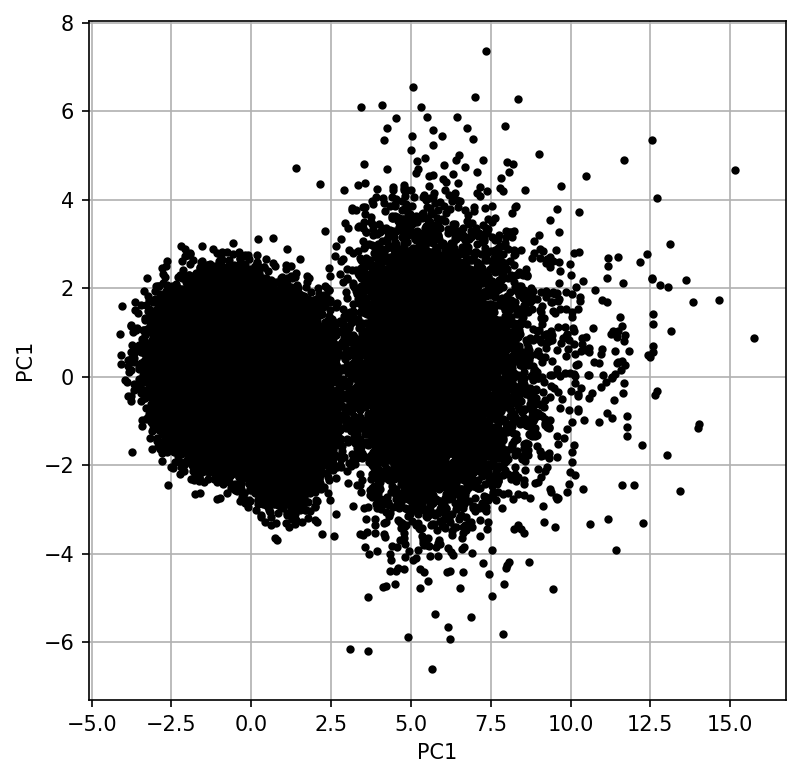

In [5]:
# z_pred_pkl = 'path_to_predicted_conf.pkl'
z_pred_pkl = "/data/users/yaolin/dpem_baselines/cryofire/logs/empiar10028_20230530_1413/conf.195.pkl"
with open(z_pred_pkl, 'rb') as f:
    z_pred = pickle.load(f)

pc, pca = analysis.run_pca(z_pred)

plt.figure(figsize=(6, 6), dpi=150)
plt.plot(pc[:, 0], pc[:, 1], 'k.')
plt.grid(True)
plt.xlabel('PC1')
plt.ylabel('PC1')
plt.show()

In [ ]:
## Generate Volumes

In [9]:
# weights = 'path_to_model_weights.pkl'
weights = '/data/users/yaolin/dpem_baselines/cryofire/logs/empiar10028_20230530_1413/weights.195.pkl'
n_volumes = 25
resolution = 128  # Make sure this is the resolution of the images given during training

out_dir = os.path.dirname(z_pred_pkl)
zs = analysis.get_pc_traj(pca, config["z_dim"], n_volumes, 1, np.min(pc[..., 0]), np.max(pc[..., 0]))
z_pkl = os.path.join(os.path.dirname(z_pred_pkl), 'z_traversal.pkl')

with open(z_pkl, 'wb') as f:
    pickle.dump(zs, f)

generate_volume(config, weights, resolution, out_dir, z_pkl)

2023-05-31 17:28:07.802707     Symmetric loss factor is 2
2023-05-31 17:28:08.204516     Generating volume 0...
2023-05-31 17:28:10.250245     Generating volume 1...
2023-05-31 17:28:10.651541     Generating volume 2...
2023-05-31 17:28:11.053802     Generating volume 3...
2023-05-31 17:28:11.445175     Generating volume 4...
2023-05-31 17:28:11.835576     Generating volume 5...
2023-05-31 17:28:12.226642     Generating volume 6...
2023-05-31 17:28:12.619919     Generating volume 7...
2023-05-31 17:28:13.020849     Generating volume 8...
2023-05-31 17:28:13.416752     Generating volume 9...
2023-05-31 17:28:13.806512     Generating volume 10...
2023-05-31 17:28:14.198794     Generating volume 11...
2023-05-31 17:28:14.596795     Generating volume 12...
2023-05-31 17:28:14.992241     Generating volume 13...
2023-05-31 17:28:15.382641     Generating volume 14...
2023-05-31 17:28:15.777636     Generating volume 15...
2023-05-31 17:28:16.178810     Generating volume 16...
2023-05-31 17:28: